逻辑回归实现


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../dataset/credit-a.csv', header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


In [4]:
data.iloc[:, -1].value_counts()

 1    357
-1    296
Name: 15, dtype: int64

In [5]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1].replace(-1, 0)

In [6]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, input_shape=(15,), activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [8]:
#loss使用二元交叉熵
#metrics存储计算结果(acc 正确率)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['acc']
)


In [9]:
history = model.fit(x, y, epochs=100)

Epoch 1/100
21/21 [==============================] - 0s 3ms/step - loss: 32.4076 - acc: 0.4533
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 23.6404 - acc: 0.4364
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 17.0524 - acc: 0.4502
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 11.8571 - acc: 0.4548
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 7.3540 - acc: 0.5069
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 4.0885 - acc: 0.6692
Epoch 7/100
21/21 [==============================] - 0s 1ms/step - loss: 2.8011 - acc: 0.6217
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 2.3809 - acc: 0.6447
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss: 2.1472 - acc: 0.6325
Epoch 10/100
21/21 [==============================] - 0s 1ms/step - loss: 1.8990 - acc: 0.6386
Epoch 11/100
21/21 [==============================] - 0

In [10]:
# 记录了训练的历史
history.history.keys()

dict_keys(['loss', 'acc'])

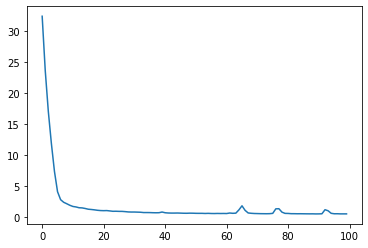

In [11]:
# 训练步骤和损失的图像
plt.plot(history.epoch, history.history.get('loss'))

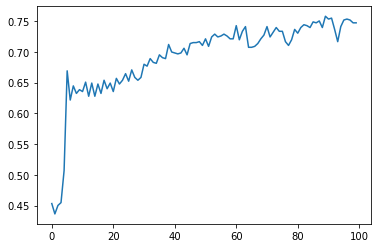

In [12]:
# 训练步骤和正确率的图像
plt.plot(history.epoch, history.history.get('acc'))